In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import gmaps
from scipy.stats import linregress


# Import API key
from config import weather_api_key
from config import g_key

In [52]:
# Define function to run linear regression.
def lin_regress(independent, dependent): 
    
    # Use scipy to calculate values for regression
    mask = ~np.isnan(independent) & ~np.isnan(dependent)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(independent[mask], dependent[mask])
    print(slope)
    print(rvalue)
    # Calculate the regression values
    regress_vals = independent*slope + intercept

    # Create string variable that holds the regression line's equation
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Plot scatter and regression line on top of scatter plot
    plt.scatter(independent, dependent, edgecolors = "black")
    plt.plot(independent, regress_vals, color = "r", label = line_eq)
    plt.legend(loc = "best")
    print(f"The correlation coefficient is {round(rvalue, 2)}")
    print(f"The r-squared value is {round(rvalue**2,2)}")

In [19]:
# Importing csv files and creating data frames

# CO2 by Country
co2_country_df = pd.read_csv("co2_emission.csv")

# CO2 by State
co2_state_df = pd.read_csv("carbon_emission_data.csv")

# GDP by Country (GPD per capita PPP)
gdp_country_df = pd.read_csv("GDP-countries-1990-2018.csv")

# GDP by State
gdp_state_df = pd.read_csv("bea-gdp-by-state.csv")

# Countries Historic climate
#climate_country_df = pd.read_csv("co2_emission.csv")

# BRIC Historic climate
bric_climate_df = pd.read_csv("BRIC-climate-1991-2016.csv")

In [33]:
gdp_country_df.head()
gdp_country_df.columns

gdp_country_df = gdp_country_df.rename(columns = {"Country " : "Country"})

In [35]:
gdp_country_2016_df = gdp_country_df[["Country", "2016"]]
gdp_country_2016_df = gdp_country_2016_df.rename(columns = {"2016" : "gdp_2016"})
gdp_country_2016_df.head()

,Country,gdp_2016
0,Aruba,38390.271650
1,Afghanistan,1896.992520
2,Angola,6756.935074
3,Albania,11868.178970
4,Arab World,16935.383300


In [41]:
gdp_country_df.columns

Index(['Country', 'Country Code', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [42]:
co2_country_df.head()
co2_country_df.columns

Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions (tonnes )'], dtype='object')

In [20]:
co2_country_df.Entity.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas (other)',
       'Andorra', 'Angola', 'Anguilla', 'Antarctic Fisheries',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia and Pacific (other)', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Republic of the Congo',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic', 'Czechoslovakia',
       'Democratic Republic of Republic of the Congo', 'Denmark',
 

In [22]:
# Removing 

co2_country_df = co2_country_df[(co2_country_df.Entity != 'Africa') &
                                (co2_country_df.Entity != 'Americas (other)') &
                                (co2_country_df.Entity != 'Antarctic Fisheries') &
                                (co2_country_df.Entity != 'Asia and Pacific (other)') &
                                (co2_country_df.Entity != 'EU-28') &
                                (co2_country_df.Entity != 'Europe (other)') &
                                (co2_country_df.Entity != 'International transport') &
                                (co2_country_df.Entity != 'Statistical differences') &
                                (co2_country_df.Entity != 'World')]


In [13]:
co2_country_df.Entity.unique()
co2_country_df.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [23]:
co2_country_df = co2_country_df.loc[(co2_country_df.Year >= 1991), :]
co2_country_df.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
42,Afghanistan,AFG,1991,2426486.16
43,Afghanistan,AFG,1992,1381521.84
44,Afghanistan,AFG,1993,1333837.11
45,Afghanistan,AFG,1994,1282488.38
46,Afghanistan,AFG,1995,1231139.65


In [43]:
co2_country_2016_df = co2_country_df.loc[(co2_country_df.Year == 2016), :]
co2_country_2016_df = co2_country_2016_df.rename(columns = {"Entity" : "Country"})
co2_country_2016_df = co2_country_2016_df.rename(columns = {"Annual CO₂ emissions (tonnes )" : "annual_co2_tonnes"})


In [44]:
co2_country_2016_df.head(10)

,Country,Code,Year,annual_co2_tonnes
67,Afghanistan,AFG,2016,1.225791e+07
419,Albania,ALB,2016,6.272858e+06
527,Algeria,DZA,2016,1.503780e+08
822,Andorra,AND,2016,5.115068e+05
890,Angola,AGO,2016,3.535100e+07
918,Anguilla,AIA,2016,1.520722e+05
1000,Antigua and Barbuda,ATG,2016,5.653968e+05
1131,Argentina,ARG,2016,2.070641e+08
1190,Armenia,ARM,2016,5.960813e+06
1249,Aruba,ABW,2016,9.280306e+05


In [45]:
co2_gdp_merge_df = co2_country_2016_df.merge(gdp_country_2016_df, how = 'inner', on = "Country")
co2_gdp_merge_df.head(10)

,Country,Code,Year,annual_co2_tonnes,gdp_2016
0,Afghanistan,AFG,2016,1.225791e+07,1896.992520
1,Albania,ALB,2016,6.272858e+06,11868.178970
2,Algeria,DZA,2016,1.503780e+08,15036.364150
3,Angola,AGO,2016,3.535100e+07,6756.935074
4,Antigua and Barbuda,ATG,2016,5.653968e+05,23670.302260
5,Argentina,ARG,2016,2.070641e+08,20130.408030
6,Armenia,ARM,2016,5.960813e+06,8808.572714
7,Aruba,ABW,2016,9.280306e+05,38390.271650
8,Australia,AUS,2016,4.133699e+08,47305.880020
9,Austria,AUT,2016,6.740208e+07,51809.513630


3956.1301399397466
0.09364402599237609
The correlation coefficient is 0.09
The r-squared value is 0.01


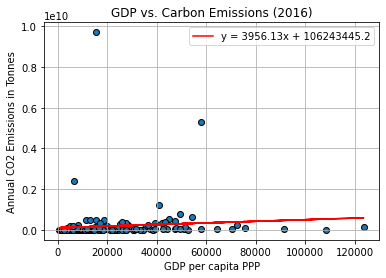

In [53]:
lin_regress(co2_gdp_merge_df.gdp_2016, co2_gdp_merge_df.annual_co2_tonnes)

plt.title("GDP vs. Carbon Emissions (2016)")
plt.xlabel("GDP per capita PPP")
plt.ylabel("Annual CO2 Emissions in Tonnes")
plt.grid(True)
plt.show()

In [62]:
co2_gdp_merge_df['Lat'] = ""
co2_gdp_merge_df['Lng'] = ""
test = 0

# Geocode
for index, row in co2_gdp_merge_df.iterrows():
    
    country = row.Country
    
    # Build the endpoint URL
    target_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={country}&key={g_key}"
    try:
        geo_data = requests.get(target_url).json()
        lat = geo_data["results"][0]["geometry"]["location"]["lat"]
        lng = geo_data["results"][0]["geometry"]["location"]["lng"]

        co2_gdp_merge_df.loc[index, 'Lat'] = lat
        co2_gdp_merge_df.loc[index, 'Lng'] = lng
        print(f"{country} found, adding coordinates")
    except:
        
        print("Could not find country.")

    
    #print(json.dumps(geo_data, indent = 4, sort_keys = True))
co2_gdp_merge_df.head()

Afghanistan found, adding coordinates
Albania found, adding coordinates
Algeria found, adding coordinates
Angola found, adding coordinates
Antigua and Barbuda found, adding coordinates
Argentina found, adding coordinates
Armenia found, adding coordinates
Aruba found, adding coordinates
Australia found, adding coordinates
Austria found, adding coordinates
Azerbaijan found, adding coordinates
Bahrain found, adding coordinates
Bangladesh found, adding coordinates
Barbados found, adding coordinates
Belarus found, adding coordinates
Belgium found, adding coordinates
Belize found, adding coordinates
Benin found, adding coordinates
Bermuda found, adding coordinates
Bhutan found, adding coordinates
Bolivia found, adding coordinates
Bosnia and Herzegovina found, adding coordinates
Botswana found, adding coordinates
Brazil found, adding coordinates
British Virgin Islands found, adding coordinates
Bulgaria found, adding coordinates
Burkina Faso found, adding coordinates
Burundi found, adding coor

,Country,Code,Year,annual_co2_tonnes,gdp_2016,Lat,Lng
0,Afghanistan,AFG,2016,1.225791e+07,1896.992520,33.9391,67.71
1,Albania,ALB,2016,6.272858e+06,11868.178970,41.1533,20.1683
2,Algeria,DZA,2016,1.503780e+08,15036.364150,28.0339,1.65963
3,Angola,AGO,2016,3.535100e+07,6756.935074,-11.2027,17.8739
4,Antigua and Barbuda,ATG,2016,5.653968e+05,23670.302260,17.0608,-61.7964


In [65]:
# Store latitude and longitude in locations and humidities in humidities
locations = co2_gdp_merge_df[["Lat", "Lng"]]
gdps = co2_gdp_merge_df.gdp_2016
carbons = co2_gdp_merge_df.annual_co2_tonnes

In [82]:
# Configure gmaps
gmaps.configure(api_key=g_key)

# Create heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=gdps, 
                                 dissipating=False, max_intensity=max(gdps),
                                 point_radius=5)



fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [79]:
max(gdps)

123573.6308

In [75]:
co2_gdp_merge_df.loc[co2_gdp_merge_df['Country'] == "China", :]

,Country,Code,Year,annual_co2_tonnes,gdp_2016,Lat,Lng
34,China,CHN,2016,9.704479e+09,15513.27304,35.8617,104.195


In [84]:
# Configure gmaps
gmaps.configure(api_key=g_key)

# Create heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=carbons, 
                                 dissipating=False, max_intensity=1*(10**9),
                                 point_radius=5)



fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))